In [272]:
import numpy,utils
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
import re

In [273]:
#This function extrat the data from the MXNet log
#it returns: speedlist, accuracylist, training loss

def mxnet_extract_data(filename):
    inFile = open(filename)
    
    #training Data
    accuracylist = np.array([]) # Accuracy pro Epoch 
    speedlist = np.array([])    # Speed of one Epoch (image/sec)
    loss_list = np.array([])
    val_acc_list = np.array([])      # Accuracy  
    val_speed_list = np.array([])    # Speed (image/sec)
   
    buffer = []
    for line in inFile:
        buffer.append(line)
        if line.startswith("Epoch["):
            word = line.split("\t")
            speedString = word[1].split(" ")[1]
            speedlist = np.append(speedlist , [speedString])
            accuracyString = word[2].split("=")[1]
            accuracylist = np.append(accuracylist , [accuracyString])
        elif line.startswith("[Epoch"):
            loss = re.search(r'.*validation: err-top1=(\d*\.*\d*) .*', line)
            if loss:
                loss_list = np.append(loss_list, float(loss.group(1)))
    accuracylist = accuracylist.astype(np.float)
    accuracylist = np.round(accuracylist, 2)
    speedlist = speedlist.astype(np.float)
    inFile.close()
    acc_val = 1 - loss_list
    return speedlist, accuracylist, loss_list, acc_val

In [274]:
#This function extrat the data from the Caffe log
#it returns: accuracy list of the testing,loss list of the testing, loss list of the training

def cafe_extract_data(filename):

    # training Data
    train_loss_list = np.array([])  # loss list of the training

    # testing Data
    test_accuracy_list = np.array([])  # accuracy list of the testing
    test_loss_list = np.array([])      # loss list of the testing

    for line in open(filename):
        match_acc_test = re.search(r'.* Test net output #0: acc/top-1 = (\d*\.*\d*)', line)
        match_loss_test = re.search(r'.* Test net output #1: loss = (\d*\.*\d*) .*', line)
        match_loss_train = re.search(r'.* Train net output #0: loss = (\d*\.*\d*) .*', line)

        if match_acc_test:
            test_accuracy_list = np.append(test_accuracy_list, float(match_acc_test.group(1)))
        elif match_loss_test:
            test_loss_list = np.append(test_loss_list, float(match_loss_test.group(1)))
        elif match_loss_train:
            train_loss_list = np.append(train_loss_list, float(match_loss_train.group(1)))
    test_accuracy_list = test_accuracy_list[7:580]
    test_loss_list = test_loss_list[7:580]
    return test_accuracy_list, test_loss_list, train_loss_list

In [275]:
#This function extrat the data from the Pytorch log
#it returns: accuracy list of the testing,loss list of the testing, loss list of the training

def py_extract_data(filename):
    training_time = np.array([]) #Training time
    test_time = np.array([])  #TestTime
    test_loss = np.array([]) #validation Loss
    test_acc = np.array([])  #validation Acc
    match_acc_test = ""
    match_time_test = ""
    match_loss_test = ""
    i = 0
    j = 0
    k = 0
    for line in open(filename):
        if line.startswith("Test: "):
            match_loss_test = re.search(r'.*Loss (\d*\.*\d*) .*', line)
            if match_loss_test:
                test_loss = np.append(test_loss, float(match_loss_test.group(1)))
        else:
            match_acc_test = re.search(r'.* Acc@1 (\d*\.*\d*) .*', line)
            if match_acc_test:
                test_acc = np.append(test_acc, float(match_acc_test.group(1)))
                
    test_acc = test_acc / 100
    print (test_time.size ,test_loss.size, test_acc.size )
    print ("Test Loss: " , test_loss[:10])
    return test_time, test_loss, test_acc
py_extract_data("pytorch.log")

0 569 569
Test Loss:  [1.1504 1.61   0.8362 1.1401 2.0787 1.2373 0.9812 0.9398 0.9087 1.1202]


(array([], dtype=float64),
 array([1.1504, 1.61  , 0.8362, 1.1401, 2.0787, 1.2373, 0.9812, 0.9398,
        0.9087, 1.1202, 1.2437, 1.1783, 1.2131, 0.7339, 0.9698, 0.7497,
        0.8959, 1.1099, 0.6397, 0.5477, 0.7762, 0.4908, 1.3506, 0.9349,
        0.7848, 0.5979, 0.4269, 0.9201, 0.6996, 0.5973, 0.6525, 0.5513,
        0.3623, 0.4588, 0.9682, 0.3136, 0.4681, 0.9293, 0.4092, 0.9031,
        0.4183, 0.2742, 0.3937, 0.3635, 0.586 , 0.5249, 0.6504, 0.2963,
        0.3614, 0.2741, 0.4173, 0.372 , 0.3193, 0.2279, 0.3841, 0.5823,
        0.3113, 0.3125, 0.3415, 0.4012, 0.3719, 0.317 , 0.4232, 0.3813,
        0.436 , 0.3143, 0.2193, 0.3749, 0.3089, 0.3841, 0.4484, 0.3492,
        0.1351, 0.5608, 0.6146, 0.2412, 0.4096, 0.1188, 0.3169, 0.3065,
        0.416 , 0.3503, 0.5772, 0.4162, 0.2668, 0.563 , 0.3011, 0.3582,
        0.6114, 0.211 , 0.2097, 0.5695, 0.2673, 0.8357, 0.2646, 0.552 ,
        0.4559, 0.3128, 0.2546, 0.8389, 0.1995, 0.609 , 0.1954, 0.5372,
        0.3108, 0.1986, 0.3951, 0.362

In [276]:
c_test_accuracy, c_test_loss, c_train_loss = cafe_extract_data("caffe.log")
mx_training_time , mx_training_accuracy, mx_test_loss, mx_acc_val = mxnet_extract_data("mxnet.log")
py_test_time, py_test_loss, py_test_acc = py_extract_data("pytorch.log")
c_list= numpy.arange(0,c_test_accuracy.size) #Number of epich for Caffe
mx_list= numpy.arange(0,mx_acc_val.size)  # Number of Epochs for MXnet
p_list = numpy.arange(0,py_test_acc.size)  # Number of Epochs for Pytorch

0 569 569
Test Loss:  [1.1504 1.61   0.8362 1.1401 2.0787 1.2373 0.9812 0.9398 0.9087 1.1202]


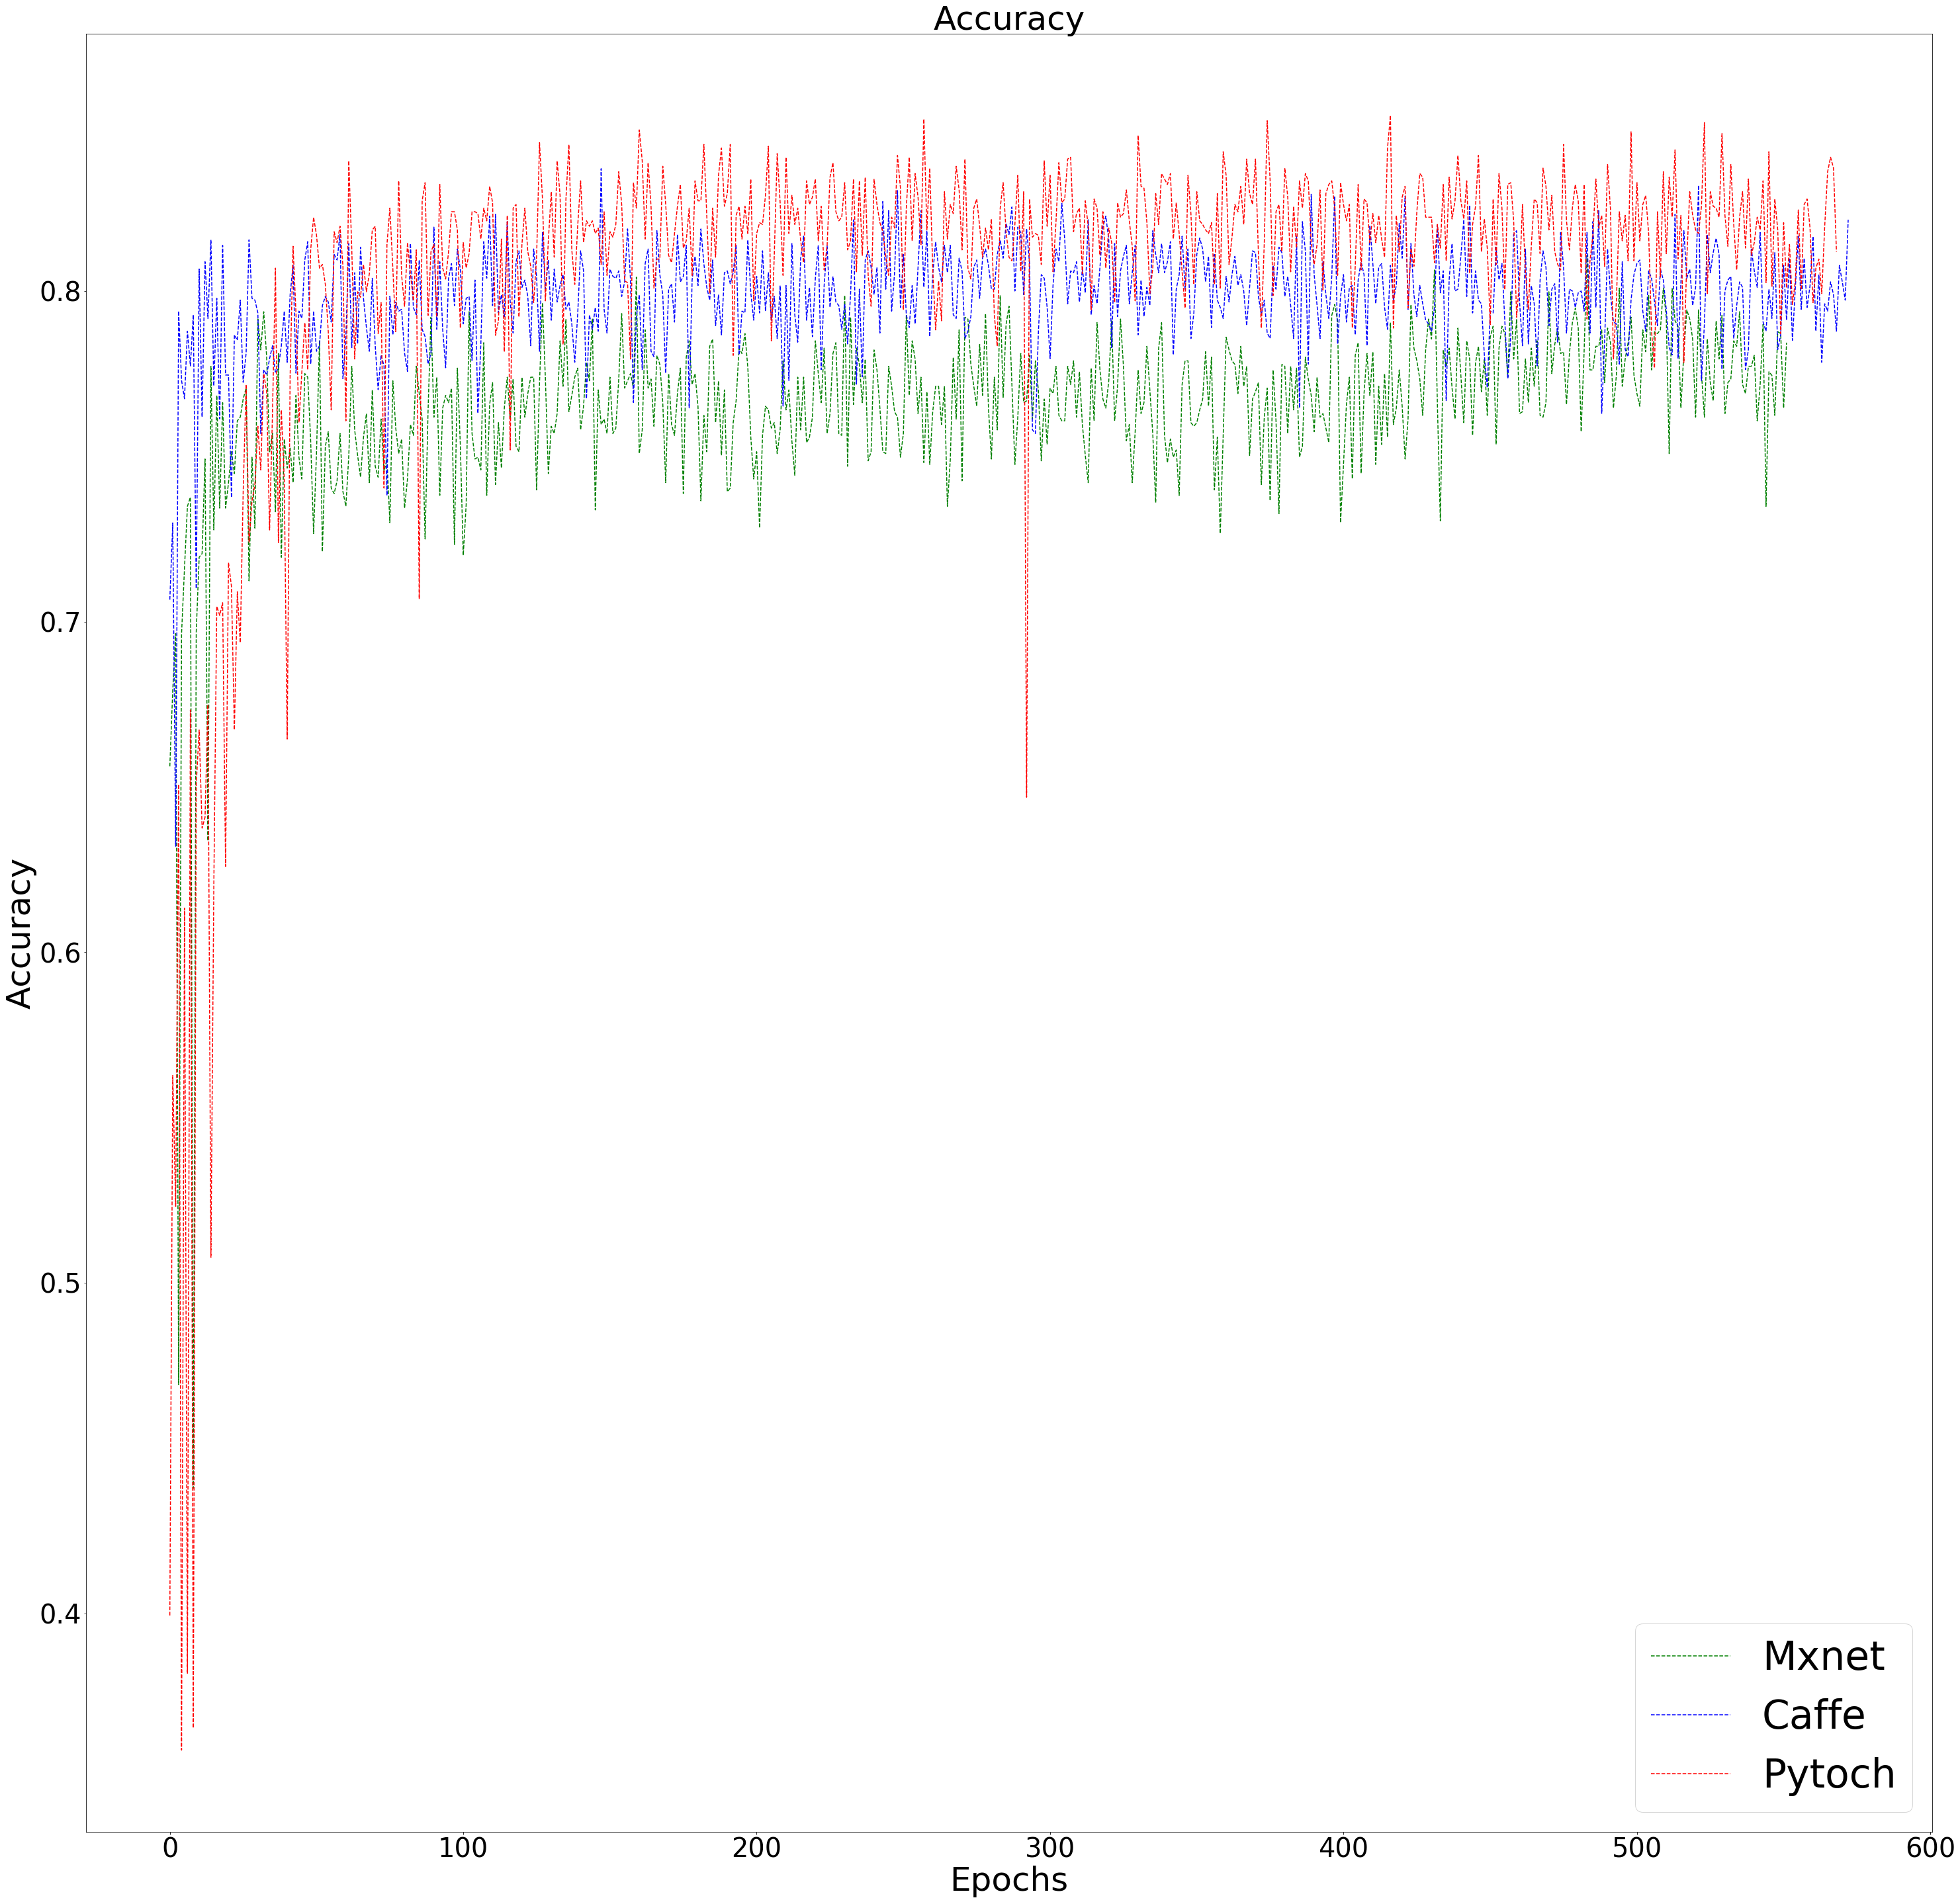

In [277]:
#Accuracy
set_matplotlib_formats('pdf','png')
plt.rcParams['savefig.dpi'] = 90

graph = plt.figure()
graph.set_figheight(50)
graph.set_figwidth(50)
plt.plot(mx_list,mx_acc_val ,'--', label='Mxnet' , markersize=20, color = "green" )
plt.plot(c_list,c_test_accuracy ,'--', label='Caffe', markersize=20 , color = "blue")
plt.plot(p_list,py_test_acc ,'--', label='Pytoch', markersize=20 , color = "red")

plt.xlabel('Epochs' , fontsize=50); 
plt.ylabel('Accuracy', fontsize=50)
plt.legend(prop={'size': 60}, loc = 'lower right')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.autoscale(enable=True, axis='x')
plt.title('Accuracy' , fontsize=50)
plt.show()
graph.savefig("Accuracy2.jpg")

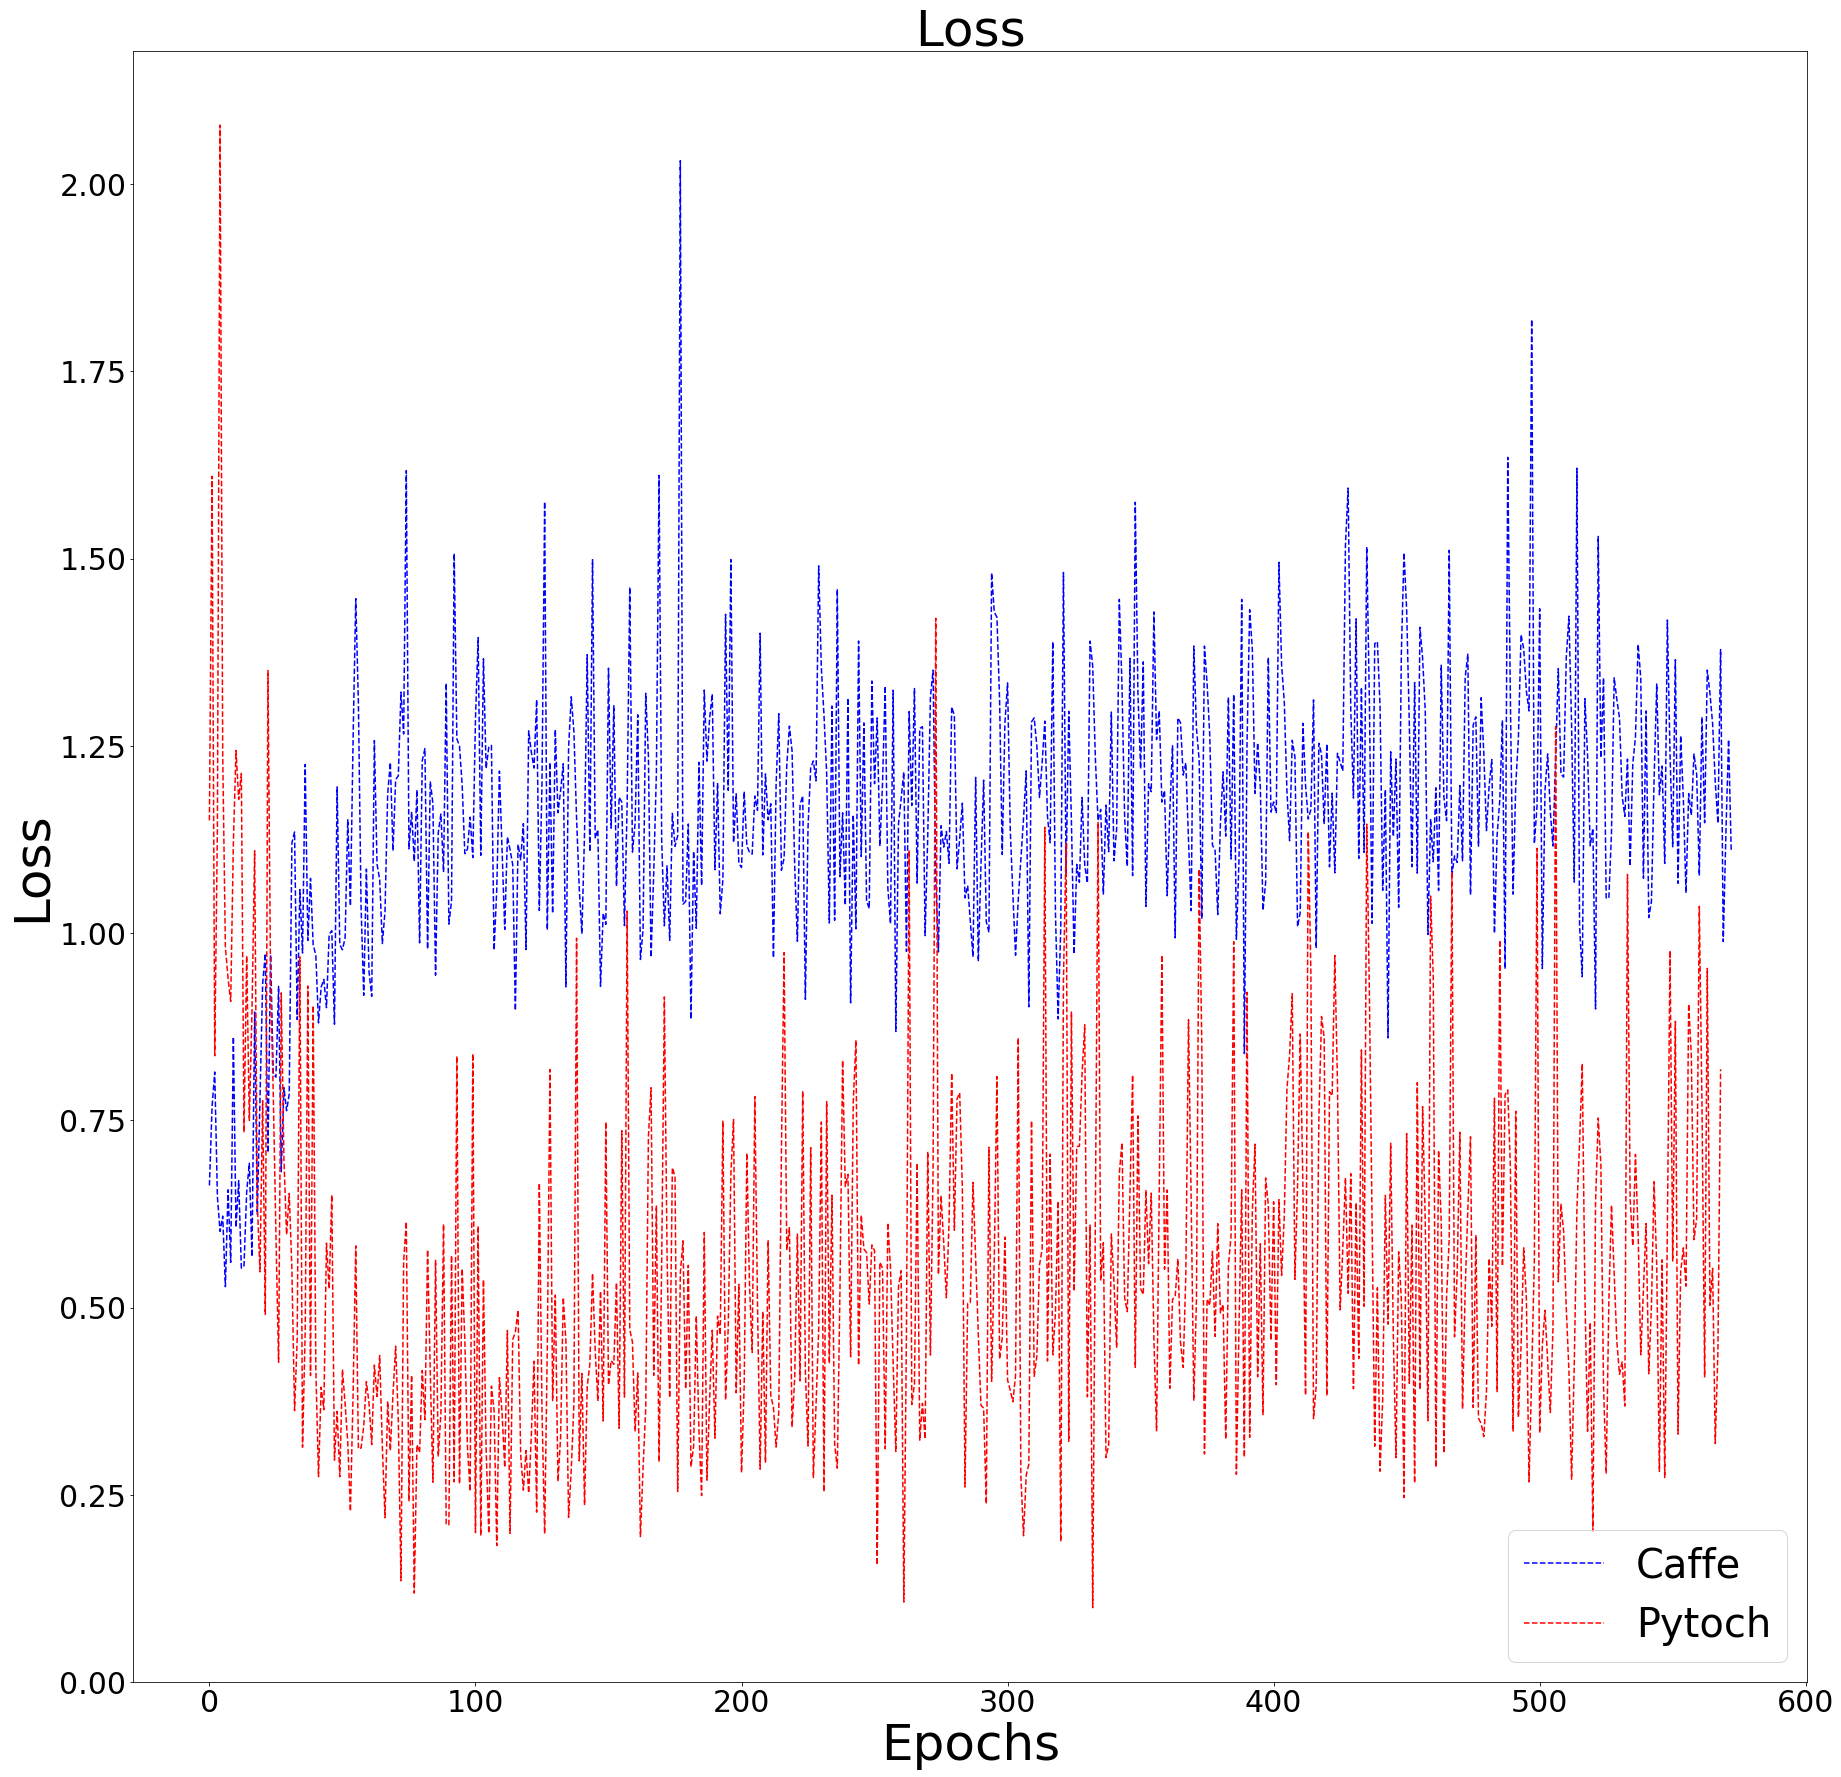

In [283]:
#Loss
graph = plt.figure()
graph.set_figheight(30)
graph.set_figwidth(30)

c_list= numpy.arange(0,c_test_loss.size)
p_list = numpy.arange(0,py_test_loss.size)

plt.plot(c_list,c_test_loss ,'--', label='Caffe', markersize=20 , color = "blue")
plt.plot(p_list,py_test_loss ,'--', label='Pytoch', markersize=20 , color = "red")

plt.xlabel('Epochs' , fontsize=50); 
plt.ylabel('Loss', fontsize=50)
plt.legend(prop={'size': 40}, loc = 'lower right')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.autoscale(enable=True, axis='x')
plt.title('Loss' , fontsize=50)
plt.show()
graph.savefig("Loss.jpg")

<function matplotlib.pyplot.show>

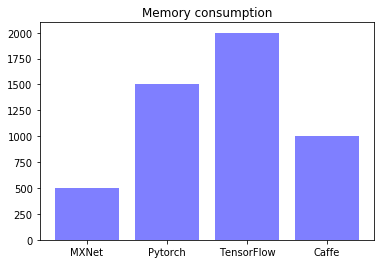

In [279]:
#Memory Consumption
objects = ('MXNet' , 'Pytorch', 'TensorFlow', 'Caffe')
y_pos = np.arange(len(objects))
#replace with real memory consumption of each framework
mem_consum = [500,1500,2000, 1000] 
plt.bar(y_pos, mem_consum, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.title('Memory consumption')
plt.show